.### Hypothesis Testing
#### Examples
1. Test a proportion: Biased coin? 200 heads have been found over 300 flips, is it coins biased?
2. Test the association between two variables.
    - Exemple height and sex: In a sample of 25 individuals (15 females, 10 males), is female height is different from male height ?<br>
    - Exemple age and arterial hypertension: In a sample of 25 individuals is age height correlated with arterial hypertension?

#### Steps
1. Model the data
2. Fit: estimate the model parameters (frequency, mean, correlation, regression coeficient)
3. Compute a test statistic from model the parameters.
4. Formulate the null hypothesis: What would be the (distribution of the) test statistic if the observations are the result of pure chance.
5. Compute the probability (𝑝-value) to obtain a larger value for the test statistic by chance (under the null hypothesis).

##### Flip coin: Simplified example
Biased coin ? 2 heads have been found over 3 flips, is it coins biased ?<br>
1. Model the data: number of heads follow a Binomial disctribution.
2. Compute model parameters: N=3, P = the frequency of number of heads over the number of flip: 2/3.
3. Compute a test statistic, same as frequency.
4. Under the null hypothesis the distribution of the number of tail is:

8 possibles configurations, probabilities of differents values for 𝑝 are: 𝑥 measure the number of success.<br>
• 𝑃(𝑥 = 0) = 1/8<br>
• 𝑃(𝑥 = 1) = 3/8<br>
• 𝑃(𝑥 = 2) = 3/8<br>
• 𝑃(𝑥 = 3) = 1/8<br>

Text(0.5, 0, 'Distribution of the number of head over 3 flip under the null hypothesis')

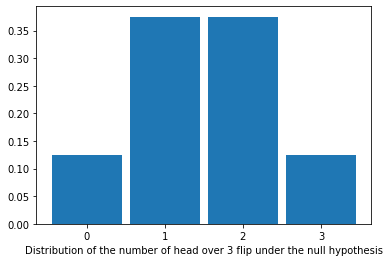

In [4]:
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
plt.xlabel("Distribution of the number of head over 3 flip under the null hypothesis")

Compute the probability (𝑝-value) to observe a value larger or equal that 2 under the null 
hypothesis ? This probability is the 𝑝-value:
$𝑃(𝑥 ≥ 2|𝐻_{0}) = 𝑃(𝑥 = 2) + 𝑃(𝑥 = 3) = 3/8 + 1/8 = 4/8 = 1/2$

Flip coin: Real Example
Biased coin ? 60 heads have been found over 100 flips, is it coins biased ?
1. Model the data: number of heads follow a Binomial disctribution.
2. Compute model parameters: N=100, P=60/100.
3. Compute a test statistic, same as frequency.
4. Compute a test statistic: 60/100.
5. Under the null hypothesis the distribution of the number of tail (𝑘) follow the binomial distribution of parameters N=100, P=0.5:

$Pr(X = k|H_{0}) = Pr(X = k|n = 100, p = 0.5) =  (_{k}^{100})0.5^k(1 - 0.5)^ {(100-k)}$
$$P(X = k \geq 60|H_{0}) = \sum_{k=60}^{100} (_{k}^{100}) 0.5^k(1-0.5)^{(100-k)} = 1-\sum_{k=1}^{60} (_{k}^{100}) 0.5^{k}(1-0.5)^{(100-k)}$$ the cumulative distribution function.

0.01760010010885238


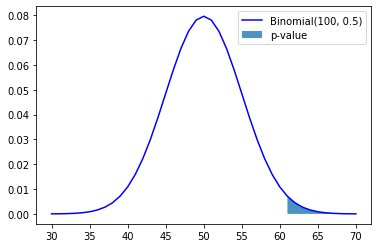

In [9]:
import scipy.stats
import matplotlib.pyplot as plt
#tobs = 2.39687663116 # assume the t-value
succes = np.linspace(30, 70, 41)
plt.plot(succes, scipy.stats.binom.pmf(succes, 100, 0.5), 'b-', label="Binomial(100, 0.5)")
upper_succes_tvalues = succes[succes > 60]
plt.fill_between(upper_succes_tvalues, 0, scipy.stats.binom.pmf(upper_succes_tvalues, 100,0.5), alpha=.8, label="p-value")
_ = plt.legend()
pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)

Random sampling of the Binomial distribution under the null hypothesis

P-value using monte-carlo sampling of the Binomial distribution under H0= 0.025897410258974102


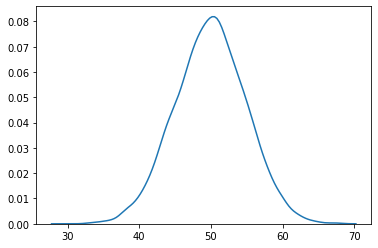

In [11]:
sccess_h0 = scipy.stats.binom.rvs(100, 0.5, size=10000, random_state=4)
#sccess_h0 = np.array([) for i in range(5000)])
import seaborn as sns
_ = sns.distplot(sccess_h0, hist=False)
pval_rnd = np.sum(sccess_h0 >= 60) / (len(sccess_h0) + 1)
print("P-value using monte-carlo sampling of the Binomial distribution under H0=", pval_rnd)

#### One Sample t-test:- 
This t-test is the statistical measure used to test whether the given sample of observation could have been generated by a process, with a specific mean. Suppose that we are interested in obtaining whether 'xyz' company produces bikes that wieghs 100 kgs. To test this we collect a sample of bikes from the company and measure their weights and compare the  sample with 100 kgs weight using a one sample t-test.<br> There are two kinds of hypotheses for a one sample t-test, the null hypothesis and the alternative hypothesis.<br> 
The null hypothesis (H0) assumes that the difference between the true mean (μ) and the comparison value (m0) is equal to zero.<br>
• The two-tailed alternative hypothesis (H1) assumes that the difference between the true mean (μ) and the comparison value (m0) is not equal to zero.<br>
• The upper-tailed alternative hypothesis (H1) assumes that the true mean (μ) of the sample is greater than the comparison value (m0).<br>
• The lower-tailed alternative hypothesis (H1) assumes that the true mean (μ) of the sample is less than the comparison value (m0).<br>
$H_{0}: μ = m_{0}$<br>
$H_{1}: μ ≠ m_{0}$<br>
$H_{1}: μ > m_{0}$<br>
$H_{1}: μ < m_{0}$<br>
##### Steps
1. Calculate the sample mean.
$\bar{y} = \frac{y1+y2+y3+...y_{n}}{n}$
2. Calculate the samples standard deviation.
$\sigma = \sqrt{\frac{(y_{1}-\bar{y})^{2}+(y_{1}-\bar{y})^{2}+...+(y_{n}-\bar{y})^{2}}{n-1}}$
3. Calculate the test statistics
$t = \frac{\bar{y}-m_{0}}{\sigma / \sqrt{n}}$
4. Calculate the probability of observing the test statistic under the null hypothesis. This value is obtained by comparing t to a t-distribution with (n − 1) degrees of freedom. This can be done by looking up the value in a table, such as those found in many statistical textbooks, or with statistical software for more accurate results.<br>
p = 2 ⋅ Pr(T > |t|)<br>
p = Pr(T > t)<br>
p = Pr(T < t)<br>
Once the assumptions have been verified and the calculations are complete, all that remains is to determine whether the results provide sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis.

#### Example
Given the following samples, we will test whether its true mean is 1.75.
Warning, when computing the std or the variance, set ddof=1. The default value, ddof=0, leads
to the biased estimator of the variance.

In [2]:
import numpy as np
x= [ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]
xbar = np.mean(x) # sample mean
mu0 = 1.75 # hypothesized value
s = np.std(x, ddof=1) # sample standard deviation
n = len(x) # sample size
tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

2.3968766311585883


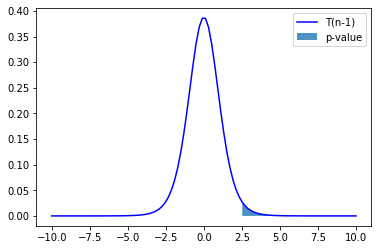

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
#tobs = 2.39687663116 # assume the t-value
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, stats.t.pdf(upper_tval_tvalues, n-1), alpha=.8,label="p-value")
_ = plt.legend()